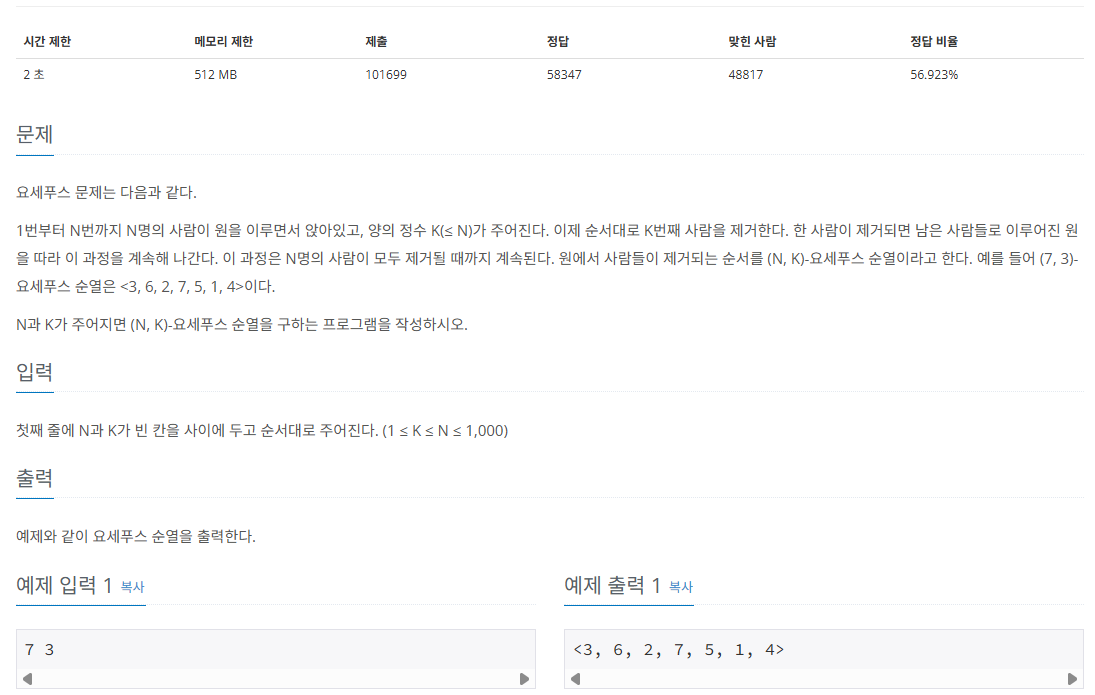

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-23 234614.png")
img

In [ ]:
from collections import deque
import sys

N,K=map(int,sys.stdin.readline().split())

dq=deque([(x+1) for x in range(N)])

def implement(dq,K):
    for _ in range(K-1):
        dq.append(dq.popleft())
        # print(dq)
    return dq.popleft()

print('<',end='')
while(len(dq)-1):

    print(implement(dq,K),end=', ')

print(implement(dq,K),end='>')



---
### ## 총평 및 5점 척도 평가

* **내 풀이 (User's solution): 4.5 / 5.0 점**
    * **평가:** **매우 훌륭한 정답입니다.** 문제의 핵심을 정확히 파악하고, `deque`의 `popleft`와 `append`를 이용해 '회전'과 '제거' 로직을 O(1) 시간 복잡도로 구현했습니다. 전체 알고리즘이 효율적이며, 문제 해결 능력을 명확히 보여줍니다.

* **Gemini의 풀이: 5.0 / 5.0 점**
    * **평가:** 사용자님의 효율적인 로직을 그대로 유지하면서, 코드의 가독성과 출력 방식을 조금 더 Pythonic하게 다듬은 버전입니다.

---
### ## 1. 알고리즘 측면

* **평가:** **최적의 알고리즘을 사용했습니다.** `deque`를 사용하여 전체 시간 복잡도를 O(N*K)로 만드셨습니다. N과 K의 최댓값이 1,000이므로, 이 방법은 시간 제한 내에 충분히 통과할 수 있는 훌륭한 접근법입니다. 알고리즘 자체는 더 이상 개선할 부분이 없습니다.

---
### ## 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 개선할 점**
1.  **출력 로직:** `<`를 먼저 출력하고, `while` 루프에서 `, `를 붙여 출력한 뒤, 마지막에 남은 하나를 따로 출력하는 방식은 동작은 하지만 코드가 다소 복잡해 보입니다. "마지막 하나"를 위해 별도의 코드를 작성해야 하죠.
2.  **회전 로직:** `for _ in range(K-1):` 루프를 사용해 직접 회전시키는 것은 직관적이고 좋지만, `deque`에는 이 동작을 위해 특별히 만들어진 메서드가 있습니다.

#### **배울 점**
1.  **"모아서 한번에 출력하기":** 이전에 논의했던 것처럼, 제거되는 숫자들을 **별도의 리스트에 모두 저장**한 뒤, 마지막에 `join` 메서드를 사용해 `<3, 6, 2, 7, 5, 1, 4>` 형태의 문자열로 한 번에 만들어 출력하면 코드가 훨씬 간결하고 깔끔해집니다.
2.  **`deque.rotate(n)`:** `deque`에는 원형 회전을 위한 `rotate()` 메서드가 내장되어 있습니다.
    * `dq.rotate(-1)`은 `dq.append(dq.popleft())`와 정확히 동일한 작업을 수행합니다.
    * 따라서 `for _ in range(K-1):` 루프 전체를 `dq.rotate(-(K-1))` 단 한 줄로 바꿀 수 있습니다. 코드의 의도가 "K-1칸 왼쪽으로 회전시킨다"라고 명확하게 드러나죠.

---
### ## 3. 또 다른 측면: 코드의 구조와 가독성

이번 코드에서 개선할 수 있는 부분은 **'로직의 분리'**입니다.

* **현재 구조:** 출력 로직이 `print('<', ...)` → `while` 루프 → `print(..., '>')` 이렇게 세 부분으로 나뉘어 있습니다.
* **더 나은 구조:**
    1.  **계산 파트:** `while` 루프를 돌면서 제거되는 숫자들을 `results`라는 리스트에 순서대로 모두 담습니다.
    2.  **출력 파트:** 계산이 모두 끝난 뒤, 완성된 `results` 리스트를 가지고 단 한 줄의 `print` 문으로 최종 형태를 만듭니다.

이렇게 **'계산'과 '출력'을 명확하게 분리**하면, 각 부분의 역할이 명확해져 코드를 읽고 이해하기가 훨씬 쉬워집니다. 나중에 출력 형식을 바꿔야 할 때도 계산 로직은 건드리지 않고 출력 부분만 수정하면 되므로 유지보수에도 유리합니다.